In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class WindyGrid:
    action_table = {0: np.array((0, 1)), 1: np.array((1, 0)), 2: np.array((0, -1)), 3: np.array((-1, 0)), 4: np.array((1, 1)), 5: np.array((1, -1)), 6: np.array((-1, -1)), 7: np.array((-1, 1))}  # Right, Down, Left, Up, Right-Down, Right-Up, Left-Up, Left-Down

    def __init__(self):
        self.pos = (3, 0)
        self.wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

    def reset(self):
        self.pos = (3, 0)
        return self.pos
    
    def step(self, action):
        new_pos = self.pos + self.action_table[action]
        
        random_wind = np.array([0, 0])
        if self.wind[self.pos[1]] > 0:
            random_wind = -np.array([self.wind[self.pos[1]], 0]) + (np.random.choice([-1, 0, 1]), 0)
            new_pos += random_wind
        new_pos = np.clip(new_pos, [0, 0], [6, 9])

        reward = -1
        done = (new_pos == [3, 7]).all()
        self.pos = tuple(new_pos)

        return self.pos, reward, done, random_wind

In [12]:
alpha = 0.05
epsilon = 0.1
gamma = 1

episodes = 10000
cum_step = 0

In [13]:
def select_action(Q, state):
    if np.random.rand() < epsilon:
        return np.random.randint(8)
    else:
        return np.argmax(Q[state])

In [14]:
Q = np.zeros((7, 10, 8))

In [15]:
epi_step_log = []

for episode in range(episodes):
    env = WindyGrid()
    state = env.reset()
    action = select_action(Q, state)

    while True:
        next_state, reward, done, _ = env.step(action)
        next_action = select_action(Q, next_state)

        Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        
        state = next_state
        action = next_action
        
        cum_step += 1
        epi_step_log.append((cum_step, episode))

        if done:
            break

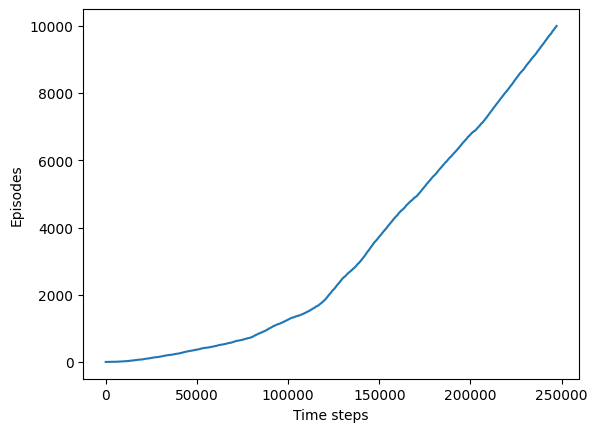

16.5


In [16]:
cum_step_np = np.array(epi_step_log)
plt.plot(cum_step_np[:, 0], cum_step_np[:, 1])
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

print((cum_step_np[-1, 0] - cum_step_np[-100, 0])/(cum_step_np[-1, 1] - cum_step_np[-100, 1]))

In [19]:
states = []
actions = []
random_winds = []

env = WindyGrid()
state = env.reset()
states.append(state)
action = np.argmax(Q[state])
actions.append(action)

while True:
    next_state, reward, done, random_wind = env.step(action)
    action = np.argmax(Q[next_state])

    state = next_state
    states.append(state)
    actions.append(action)
    random_winds.append(random_wind)

    if done:
        break

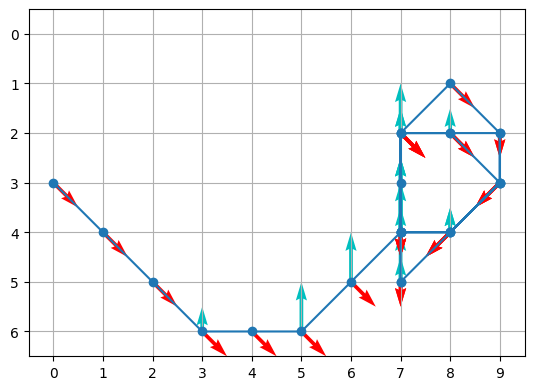

In [20]:
states_np = np.array(states)
plt.plot(states_np[:, 1], states_np[:, 0], 'o-')
plt.xticks(range(10))
plt.yticks(range(7))
plt.xlim(-0.5, 9.5)
plt.ylim(6.5, -0.5)
plt.grid()
# plt axis equal
plt.gca().set_aspect('equal', adjustable='box')
for i in range(len(states_np)-1):
    plt.quiver(states_np[i, 1], states_np[i, 0], WindyGrid.action_table[actions[i]][1], WindyGrid.action_table[actions[i]][0], angles='xy', scale_units='xy', scale=2, color='r')
    plt.quiver(states_np[i, 1], states_np[i, 0], random_winds[i][1], random_winds[i][0], angles='xy', scale_units='xy', scale=2, color='c')
plt.show()